In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from models.unet.unet import UNet
from models.unet.unet_formes import UNetFormes
from src.data_processing.dataset_loader import CoastData
from src.models.data_management.data_loader import DataLoaderManager

import cv2

In [2]:
# Load the data to split it and save it to a dict
path = os.path.abspath(os.path.join(os.getcwd(), "../../data/patchify_4_classes/"))

In [3]:
unet = UNet(num_classes=4, experiment_name="test_experiments", use_mlflow=False)

In [4]:
# Load the data to the model
data = unet.load_data(path, UNetFormes)

Not classified percentage: 42.260%

Land percentage: 31.173%

Sea percentage: 26.415%

Shoreline percentage: 0.153%

---

not_classified = 42,260 / 42,260 =  1

land = 42,260 / 31,173 = 1,36

sea = 142,260 / 26,415 = 1,60

shoreline = 42,260 / 0,153 = 276,14


In [5]:
weight = [1, 1.36, 1.60, 276.14]

artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))

# Train the model
# unet.train(epochs=50, loss_function_name="BCEWithLogitsLoss", weight=weight, artifact_path=artifact_path)

# Predictions

(array([0, 1, 2, 3], dtype=uint8), array([46160, 14763,  4423,   190]))
(array([0, 1, 2, 3]), array([46134, 14873,  4349,   180]))


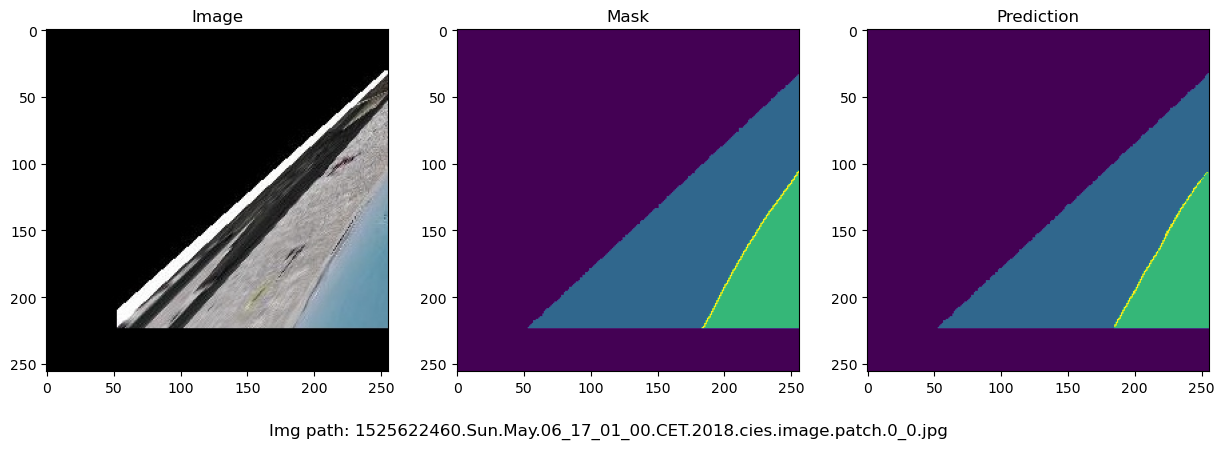

In [22]:
# Predict one patch
artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/patchify_4_classes/"))

data = DataLoaderManager.load_data(data_path)
index = 0 # 72
img_path = data["test"]['images'][index]
mask_path = data["test"]['masks'][index]

unet.load_model(os.path.abspath(os.path.join(artifact_path, "2025-02-19-15-28-50/models/best_model.pth")))

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# pred = unet.predict(img)
pred = unet.predict(img_path)

print(np.unique(mask, return_counts=True))
print(np.unique(pred, return_counts=True))


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Img path: {img_path.split('/')[-1]}", y=0.05)

ax[0].imshow(img)
ax[0].set_title("Image")

ax[1].imshow(mask)
ax[1].set_title("Mask")

ax[2].imshow(pred.squeeze())
ax[2].set_title("Prediction")

plt.show()

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
(array([0, 1, 2, 3], dtype=uint8), array([ 58439, 181216,  93116,    909]))
(array([0, 1, 2, 3]), array([ 58430, 179722,  95179,    349]))


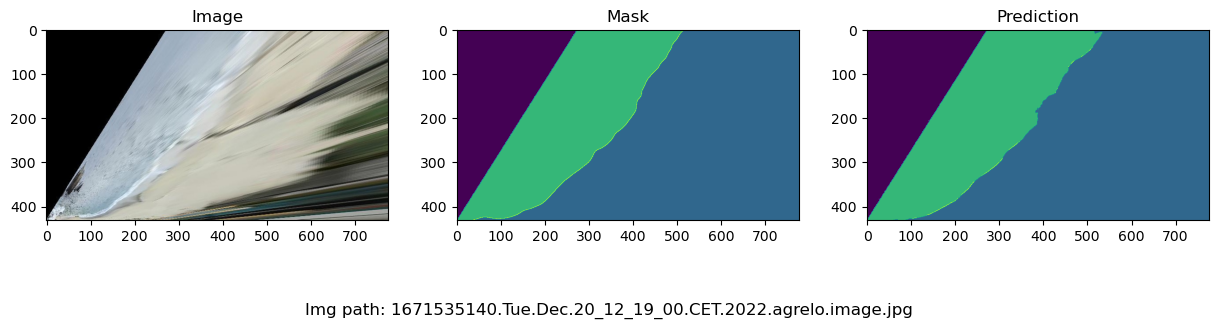

In [24]:
# Predict the full image
artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_4_classes/"))

coast_data = CoastData(data_path)
split = coast_data.split_data()

data = DataLoaderManager.load_data(split)
index = 0 # 25 # 72
img_path = data["test"]['images'][index]
mask_path = data["test"]['masks'][index]

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

unet.load_model(os.path.abspath(os.path.join(artifact_path, "2025-02-19-15-28-50/models/best_model.pth")))

pred = unet.predict_patch(img_path, combination="max")

print(np.unique(mask, return_counts=True))
print(np.unique(pred, return_counts=True))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle(f"Img path: {img_path.split('/')[-1]}", y=0.05)

ax[0].imshow(img)
ax[0].set_title("Image")

ax[1].imshow(mask)
ax[1].set_title("Mask")

ax[2].imshow(pred.squeeze())
ax[2].set_title("Prediction")

plt.show()